In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [39]:

# for morning runners, the shoes show a performance decline
# also, most morning runners run without shoes
noshoes_morning = 100 + np.random.randn(50) 
shoes_morning = 95 + np.random.randn(10) 

# for evening runners, the shoes show a performance decline 
# but evening runners are faster over all, and most evening runners wear shoes
noshoes_evening = 110 + np.random.randn(10) 
shoes_evening = 105 + np.random.randn(50) 



In [40]:
df = pd.concat([
    pd.DataFrame({'shoes':0,'evening':0,'time':noshoes_morning}),
    pd.DataFrame({'shoes':1,'evening':0,'time':shoes_morning}),
    pd.DataFrame({'shoes':0,'evening':1,'time':noshoes_evening}),
    pd.DataFrame({'shoes':1,'evening':1,'time':shoes_evening})
])


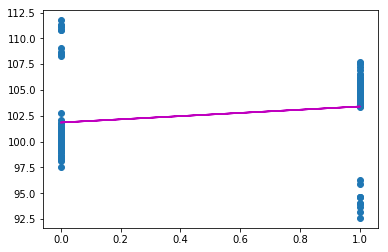

In [43]:
lm = LinearRegression() 
dependent = df[['shoes']].values
y = df[['time']].values
lm.fit(dependent,y)
plt.scatter(x=dependent, y=y)
plt.plot(x, lm.predict(dependent), '-', color='m')

In [44]:
lm.coef_

array([[ 1.54885113]])

Text(0.5,0,'evening')

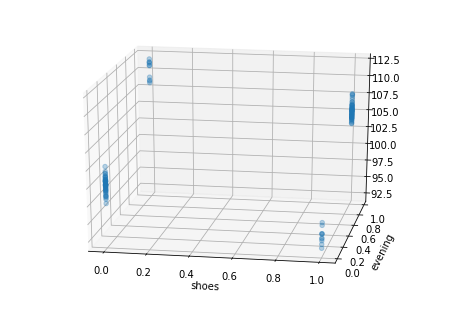

In [54]:
# Look at this in 3D
fig = plt.figure()
ax = Axes3D(fig, elev=20, azim=-80)
ax.scatter(df.shoes, df.evening, df.time, alpha=0.3)
ax.set_xlabel('shoes')
ax.set_ylabel('evening')

In [55]:
# Helpful function that we'll use later for making more 3D regression plots
def plot_regression_3d(x, y, z, model, elev=30, azim=30, xlab=None, ylab=None):
    fig = plt.figure()
    ax = Axes3D(fig, elev=elev, azim=azim)

    # This looks gnarly, but we're just taking four points at the corners of the plot, 
    # and using predict() to determine their vertical position
    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()
    corners_x = np.array([[xmin, xmin], [xmax, xmax]])
    corners_y = np.array([[ymin, ymax], [ymin, ymax]])
    corners_z = model.predict(np.array([[xmin, xmin, xmax, xmax], [ymin, ymax, ymin, ymax]]).T).reshape((2, 2))
    ax.plot_surface(corners_x, corners_y, corners_z, alpha=0.5)

    ax.scatter(x, y, z, alpha=0.3)

    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

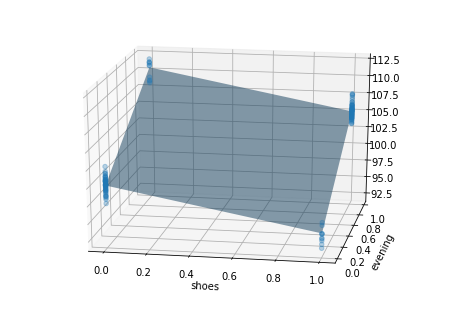

In [59]:
# Now fit a two variable regression -- "control" for evening
lm = LinearRegression() 
dependent = df[['shoes','evening']].values
lm.fit(dependent,y)
plot_regression_3d(dependent[:,0], dependent[:,1], y, lm, elev=20, azim=-80, xlab='shoes', ylab='evening')

In [60]:
lm.coef_

array([[ -5.390722 ,  10.4093597]])